In [1]:
from optimization_func import simulated_annealing
from helper import mse, lotka_volterra, int_cost_lotka_volterra, get_predator_prey_data

t, P = get_predator_prey_data()

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams["figure.dpi"] = 180
mpl.rcParams["legend.fontsize"] = 11
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"""
\usepackage{palatino}
\usepackage{newpxmath}""")
plt.rc("font", family="serif")

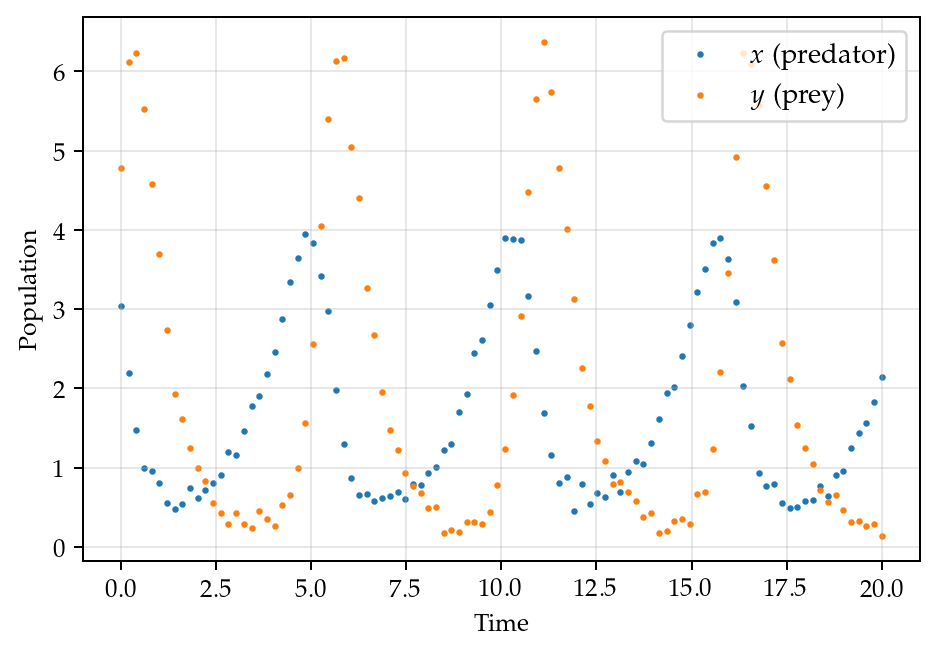

In [3]:
#plt.plot(t, z[0], label="$x$ fit", alpha=0.7)
#plt.plot(t, z[1], label="$y$ fit", alpha=0.7)
plt.scatter(t, P[:,0], s=2.5, label="$x$ (predator)")
plt.scatter(t, P[:,1], s=2.5, label="$y$ (prey)")
plt.ylabel("Population")
plt.xlabel("Time")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

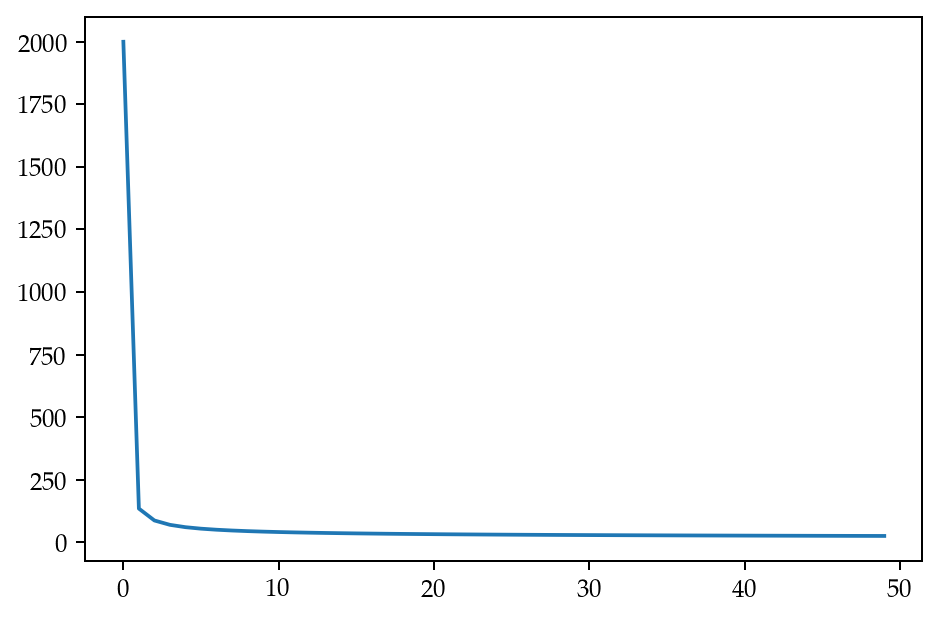

In [3]:
import numpy as np
T_sched2 = 1/np.linspace(0.001, 100, 50)**1.1
T_sched =  [(2000/(1 + 20*np.log(1 + k))) for k in range(50)]
plt.plot(T_sched)
#plt.plot(T_sched2)


In [17]:
np.random.seed(890)
s0 = [1, 1, 0.2, 1]
x = simulated_annealing(s0, t, P, T_start=20000, T_steps=5000)

1.0
0.9964350339078721
1.0
0.9937131104708384
1.0
1.0
0.998659195442166
1.0
0.9919453507927668
1.0
0.9890909639890942
1.0
1.0
1.0
0.9921740928323906
0.9978028590411425
0.997171185759237
0.9944512311802813
1.0
0.9898350636900931
1.0
0.987623466614212
1.0
0.9516113192395965
1.0
1.0
0.9493852161696466
0.9091432631501589
1.0
0.7840503830011608
0.0017953531912920846
1.4767690275968932e-16
1.0
0.5684012385611779
1.0
0.9757860282949482
1.0
0.8234964605819036
0.8056443921734087
0.825460893784754
1.0
0.0010212286111379789
0.16011799037825208
1.0
1.0
0.9544496650087209
1.0
1.0
0.9744536247492386
0.9951778390483288
0.9952804618538934
0.6623729203517481
1.0
0.6373159894344789
1.0
0.023865819953354336
0.8264781695595284
0.78500844239426
1.0
1.0
1.0
0.8527016305475765
0.6859419822116765
1.0
0.22912783578060208
0.5599117742199352
0.657852855560642
0.5693324372777898
0.9118788061269063
1.0
0.9670154757677354
1.0
0.8699856714145536
0.8688031171773289
1.0
0.9045982620188792
0.8852705578504173
1.0
0.9347

In [14]:
print(x)

[ 1.4905971   4.11430683  7.89981501 13.02928135]


In [15]:
int_cost_lotka_volterra(s0, P, t, cost=mse)

10.188737461058418

10.713222423908212


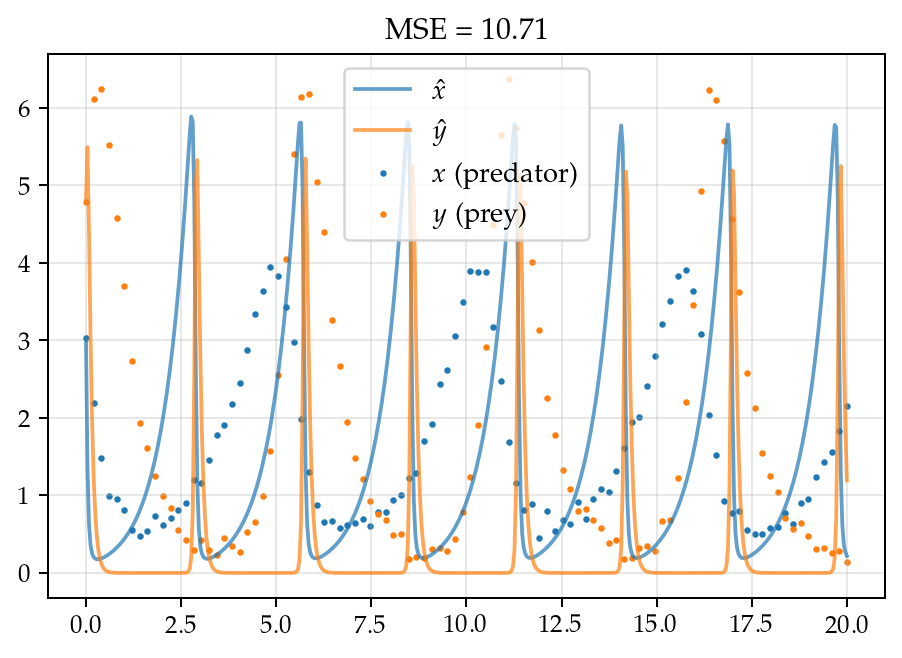

In [16]:
from scipy.integrate import solve_ivp
import numpy as np

sol_opt = solve_ivp(lotka_volterra, (t[0], t[-1]), P[0], args=x, dense_output=True)
z_opt = sol_opt.sol(t)
ts = np.linspace(t[0], t[-1], 500)
z_opt_smooth = sol_opt.sol(ts)

mse_ = mse(P, z_opt.T)
print(mse_)

plt.plot(ts, z_opt_smooth[0], label="$\\hat{x}$", alpha=0.7)
plt.plot(ts, z_opt_smooth[1], label="$\\hat{y}$", alpha=0.7)
plt.scatter(t, P[:,0], s=2.5, label="$x$ (predator)")
plt.scatter(t, P[:,1], s=2.5, label="$y$ (prey)")
plt.title(f"MSE = ${mse_:.2f}$")
plt.legend()
plt.grid(alpha=0.3)
plt.show()